In [1]:
import pickle
from ramannoodles import spectrafit

In [2]:
# open spectra library
shoyu_data_dict = pickle.load(open('../raman_spectra/shoyu_data_dict.p', 'rb'))
# list keys
sorted(shoyu_data_dict.keys())

['2-PROPANOL',
 'CARBON DIOXIDE',
 'CARBON MONOXIDE',
 'DIMETHYL KETONE',
 'ETHYL ALCOHOL',
 'FORMALDEHYDE',
 'FORMIC ACID',
 'WATER']

In [3]:
# extract spectra data
data = shoyu_data_dict['FORMIC ACID']
x_data = data['x']
y_data = data['y']

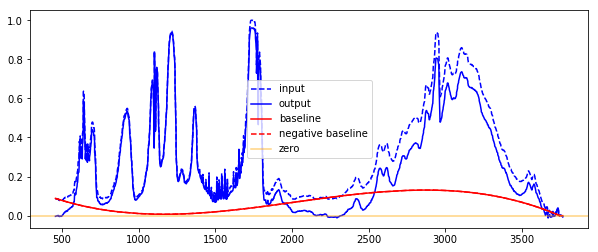

In [4]:
# subtract baseline
y_data = spectrafit.subtract_baseline(y_data, deg=3, plot=True, x_data=x_data)

In [ ]:
# detect peaks
peaks = spectrafit.find_peaks(x_data, y_data)

In [ ]:
# assign parameters for least squares fit
mod, pars = spectrafit.lorentz_params(peaks)

In [ ]:
# fit the model to the data
out = spectrafit.model_fit(x_data, y_data, mod, pars, report=True)

In [ ]:
# plot fit results
spectrafit.plot_fit(x_data, y_data, out, plot_components=True)

In [ ]:
# export data in logical structure (see docstring)
fit_peak_data = spectrafit.export_fit_data(out)
fit_peak_data

In [ ]:
# print docstring which outlines data structure
spectrafit.export_fit_data.__doc__